# System Model V3 - Shock test

The purpose of this notebook is to perform shocks of ETH price to test controller parameter stability, without stochastic processes.

For this simulation run, we will be asking the following question: how does the model behave with a eth price shock?

Run simulation with overrides over the default values:
* Ki,kp sweeps
* 'controller_enabled': [True],
* 'liquidation_ratio': [1.45],
* 'interest_rate': [1.03],
* 'liquidity_demand_enabled': [False],
* 'arbitrageur_considers_liquidation_ratio': [True],
* 'liquidity_demand_shock': [False],
*'eth_price': [lambda run, timestep, df=None: [
        # Shocks at 14 days; controller turns on at 7 days
        300,
        300 if timestep < 24 * 14 else 300 * 1.3, # 30% step, remains for rest of simulation
        300 * 1.3 if timestep in list(range(24*14, 24*14 + 6, 1)) else 300, # 30% impulse for 6 hours
        300 if timestep < 24 * 14 else 300 * 0.7, # negative 30% step, remains for rest of simulation
        300 * 0.7 if timestep in list(range(24*14, 24*14 + 6, 1)) else 300, # negative 30% impulse for 6 hours
    ][run - 1]],
* 'liquidity_demand_events': [lambda run, timestep, df=None: 0],
* 'token_swap_events': [lambda run, timestep, df=None: 0],
}

In order to test this, configure the following experiment [experiment_shocks.py](experiments/system_model_v3/experiment_shocks.py). Run run this simulation, we create a directory in the ```experiments/system_model_v3``` called ```experiment_shocks/```,and add a ```logs/``` directory inside of it.

Assuming our we have all of the requirements required (run requirements.txt from the ```reflexer/``` root directory to be sure. Assuming our terminal is in the root directory, we run the follow to run the simulation:

```bash
python3 -m experiments.system_model_v3.experiment_shocks
```
And our simulation will run. The resulting [run log](experiments/system_model_v3/experiment_shocks/experiment_run_log.md) can be found in the ```experiments/system_model_v3/experiment_shocks/``` directory, along with the simulation results stored as ```experiment_results.hdf5```


Below we will import and examine the simulation results.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Import simulation run data


In [2]:
os.getcwd()

'/home/aclarkdata/repos/reflexer/notebooks/analysis'

In [3]:
os.chdir('../../')
os.getcwd()

'/home/aclarkdata/repos/reflexer'

In [4]:
experiment_results = 'experiments/system_model_v3/experiment_shocks/experiment_results.hdf5'
experiment_results_keys = []
with pd.HDFStore(experiment_results) as store:
    experiment_results_keys = list(filter(lambda x: "results" in x, store.keys()))
    exceptions_keys = list(filter(lambda x: "exceptions" in x, store.keys()))

In [5]:
# A list of all experiment result keys
experiment_results_keys

['/results_2021-03-04T09:46:21.528200']

In [6]:
# Copy a results_ key from the above keys to select the experiment
experiment_results_key = experiment_results_keys[-1]#'results_2021-02-09T18:46:33.073363' # Or select last result: experiment_results_keys[-1]
experiment_timestamp = experiment_results_key.strip('results_')
exceptions_key = 'exceptions_' + experiment_timestamp
experiment_timestamp

'/results_2021-03-04T09:46:21.528200'

In [7]:
df_raw = pd.read_hdf(experiment_results, experiment_results_key)
df_raw.tail()

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,RAI_balance,ETH_balance,UNI_supply,uniswap_oracle,simulation,subset,run,substep,timestep,events
159144,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,806400,2017-01-10 08:00:00,0,300.0,0,3.709206e-68,...,2.467233e+125,4.576589e-114,10000000.0,None,0,24,5,18,224,NaN
159145,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,810000,2017-01-10 09:00:00,0,300.0,0,1.854603e-68,...,4.774633e+133,2.372013e-122,10000000.0,None,0,24,5,18,225,NaN
159146,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,813600,2017-01-10 10:00:00,0,300.0,0,9.273015e-69,...,9.239952e+141,1.229397e-130,10000000.0,None,0,24,5,18,226,NaN
159147,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,817200,2017-01-10 11:00:00,0,300.0,0,4.636508e-69,...,1.788131e+150,6.371875e-139,10000000.0,None,0,24,5,18,227,NaN
159148,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,820800,2017-01-10 12:00:00,0,300.0,0,2.318254e-69,...,3.460423e+158,3.302497e-147,10000000.0,<models.system_model_v3.model.parts.uniswap_or...,0,24,5,18,228,NaN


## Post process


In [8]:
from experiments.system_model_v3.post_process import post_process_results
from experiments.system_model_v3.experiment_shocks import params, SIMULATION_TIMESTEPS


* Number of timesteps: 1440 / 60.0 days
* Number of MC runs: 5
* Timestep duration: 0.004 seconds
* Control parameters: ['kp', 'ki']
* Number of parameter combinations: 25
* Expected experiment duration: 12.0 minutes / 0.2 hours
    


In [9]:
params

{'debug': [False],
 'raise_on_assert': [True],
 'free_memory_states': [['events', 'cdps', 'uniswap_oracle']],
 'IntegralType': [2],
 'eth_price': [<function experiments.system_model_v3.experiment_shocks.<lambda>(run, timestep, df=None)>],
 'liquidity_demand_events': [<function experiments.system_model_v3.experiment_shocks.<lambda>(run, timestep, df=None)>],
 'token_swap_events': [<function experiments.system_model_v3.experiment_shocks.<lambda>(run, timestep, df=None)>],
 'seconds_passed': [<function models.system_model_v3.model.params.init.<lambda>(timestep, df=None)>],
 'liquidity_demand_enabled': [False],
 'liquidity_demand_shock': [False],
 'liquidity_demand_max_percentage': [0.1],
 'liquidity_demand_shock_percentage': [0.5],
 'expected_blocktime': [15],
 'control_period': [14400],
 'controller_enabled': [True],
 'enable_controller_time': [604800],
 'kp': [2e-07,
  2e-07,
  2e-07,
  2e-07,
  2e-07,
  6e-07,
  6e-07,
  6e-07,
  6e-07,
  6e-07,
  1e-06,
  1e-06,
  1e-06,
  1e-06,
  1e

In [10]:
# add swept parameters as a column
df = post_process_results(df_raw, params, set_params=['ki', 'kp', 'liquidation_ratio'])
df

Adding new columns
0.040961265563964844
Getting parameter sweep
0.04122018814086914
Assigning parameters to subsets
0.6154067516326904
Creating target_price_scaled
0.6223130226135254


,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,run,substep,timestep,events,eth_collateral_value,collateralization_ratio,ki,kp,liquidation_ratio,target_price_scaled
0,{},{},{},0,0,2017-01-01 00:00:00,0,294.069151,1,1.000000e+00,...,1,0,0,NaN,4.553000e+07,1.450000e+00,-5.000000e-09,2.000000e-07,1.45,4.553000e+00
1,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,3600,2017-01-01 01:00:00,0,300.000000,0,5.000000e-01,...,1,18,1,NaN,4.644826e+07,1.479244e+00,-5.000000e-09,2.000000e-07,1.45,3.140000e+00
2,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,7200,2017-01-01 02:00:00,0,300.000000,0,2.500000e-01,...,1,18,2,NaN,4.644826e+07,1.450000e+00,-5.000000e-09,2.000000e-07,1.45,3.140000e+00
3,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,10800,2017-01-01 03:00:00,0,300.000000,0,1.250000e-01,...,1,18,3,NaN,4.644826e+07,1.450000e+00,-5.000000e-09,2.000000e-07,1.45,3.140000e+00
4,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,14400,2017-01-01 04:00:00,0,300.000000,0,6.250000e-02,...,1,18,4,NaN,4.644826e+07,1.450000e+00,-5.000000e-09,2.000000e-07,1.45,3.140000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159144,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,806400,2017-01-10 08:00:00,0,300.000000,0,3.709206e-68,...,5,18,224,NaN,4.644826e+07,2.806065e+08,-2.000000e-10,5.000000e-06,1.45,9.728132e-127
159145,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,810000,2017-01-10 09:00:00,0,300.000000,0,1.854603e-68,...,5,18,225,NaN,4.644826e+07,2.806065e+08,-2.000000e-10,5.000000e-06,1.45,5.026894e-135
159146,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,813600,2017-01-10 10:00:00,0,300.000000,0,9.273015e-69,...,5,18,226,NaN,4.644826e+07,2.806065e+08,-2.000000e-10,5.000000e-06,1.45,2.597586e-143
159147,"{'cdp_count': 1, 'open_cdp_count': 1, 'closed_...",{},{},3600,817200,2017-01-10 11:00:00,0,300.000000,0,4.636508e-69,...,5,18,227,NaN,4.644826e+07,2.806065e+08,-2.000000e-10,5.000000e-06,1.45,1.342271e-151


# Simulation Analysis

In [11]:
df.substep.unique()

array([ 0, 18])

In [12]:
df.subset.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [13]:
df.run.unique()

array([1, 2, 3, 4, 5])

In [14]:
df.columns

Index(['cdp_metrics', 'optimal_values', 'sim_metrics', 'timedelta',
       'cumulative_time', 'timestamp', 'blockheight', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'cdps', 'eth_collateral',
       'eth_locked', 'eth_freed', 'eth_bitten', 'principal_debt', 'rai_drawn',
       'rai_wiped', 'rai_bitten', 'accrued_interest', 'interest_dripped',
       'interest_wiped', 'interest_bitten', 'w_1', 'w_2', 'w_3',
       'system_revenue', 'stability_fee', 'market_price', 'market_price_twap',
       'target_price', 'target_rate', 'eth_return', 'eth_gross_return',
       'expected_market_price', 'expected_debt_price', 'error_star',
       'error_star_integral', 'market_slippage', 'RAI_balance', 'ETH_balance',
       'UNI_supply', 'uniswap_oracle', 'simulation', 'subset', 'run',
       'substep', 'timestep', 'events', 'eth_collateral_value',
       'collateralization_ratio', 'ki', 'kp', 'liquidation_ratio',
       'target_price_scaled'],
      dtype='object')

In [15]:
def param_sweep_aggregation(df,aggregation_dimension):
    '''
    Description:
    Function for aggregating parameter sweep runs by mean, median and standard deviation.
    
    Parameters:
    df: pandas dataframe of cadCAD parameter sweep simulation
    aggregation_dimension: dimension to aggregate on, e.x. timestep
    
    Assumptions:
    A cadCAD simulation was completed with an config N > 1 and M.
    
    Returns:
    Lists of parameter subset dataframes for mean, median, and std. The number of dataframes
    in each list is equal to the simulation N.
    
    Example run:
    means,medians,stds = param_sweep_aggregation(result,'timestep')
    '''
    
    df = df[df['substep'] == df.substep.max()]
    subsets = []
    for i in df.subset.unique():
        subsets.append(df[df['subset']==i])

    means = []
    for i in range(0,len(subsets)):
        means.append(subsets[i].groupby(aggregation_dimension).mean().reset_index())

    medians = []
    for i in range(0,len(subsets)):
        medians.append(subsets[i].groupby(aggregation_dimension).median().reset_index())

    stds = []
    for i in range(0,len(subsets)):
        stds.append(subsets[i].groupby(aggregation_dimension).std().reset_index())
        
    return means,medians,stds

def param_plot(dfs,x,y,params,swept,saveFig=False,dims=(10,6)):
    '''
    Description:
    Function to plot parameter sweep monte carlo results to illustrate the effect the swept 
    parameter has on the simulation.
    
    Parameters:
    dfs: list of a pandas dataframes calculated in param_sweep_aggregation()
    x: string of the desired x in the simulation; e.x. 'timestep'
    y: string of the desired x in the simulation; e.x. 'Velocity'
    params: list of parameter sweep values to analyze, e.x. [30,60,90]
    swept: string of the parameter swept, e.e. 'money drip'
    saveFig: optional boolean if the plot should be saved or not
    dims: optional figure size values
    
    Assumptions:
    A cadCAD simulation was completed with an config N > 1 and M and param_sweep_aggregation() was run
    
    Returns:
    Plot
    
    Example run:
    param_plot(medians,'timestep','AggregatedAgentSpend',params,swept)  
    
    '''
    plt.figure(figsize=dims)
    for i in range(0,len(dfs)):
        dfs[i][y].plot()

    plt.legend(params)
    plt.xlabel(x)
    plt.ylabel(y)
    title_text = 'Effect of ' + swept + ' Parameter Sweep on ' + y
    plt.title(title_text)
    if saveFig:
        plt.savefig(title_text + '_.png')

### Generate key plots for analysis

In [16]:
means,medians,stds = param_sweep_aggregation(df,'timestep')

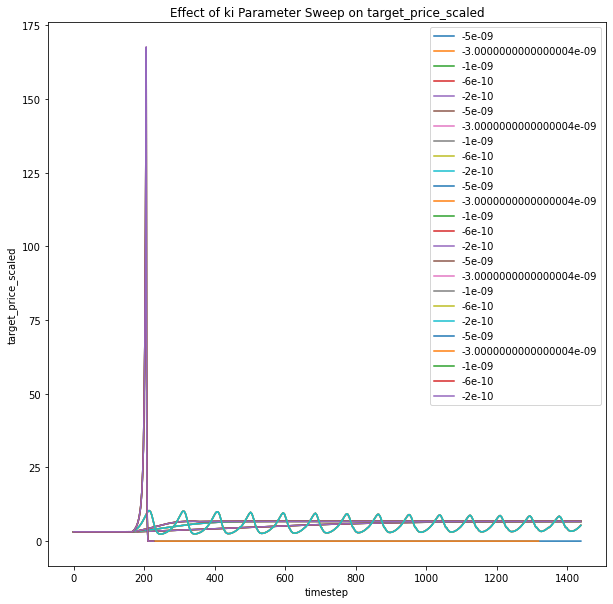

In [42]:
param_plot(medians,'timestep','target_price_scaled',params['ki'],'ki',dims=(10,10))

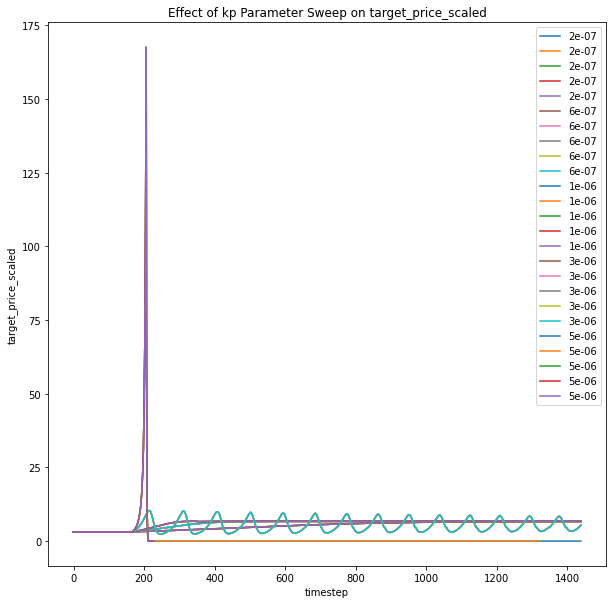

In [41]:
param_plot(medians,'timestep','target_price_scaled',params['kp'],'kp',dims=(10,10))

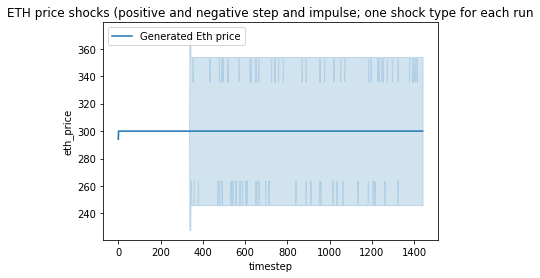

In [19]:
subset0 = df.query('subset==0')
sns.lineplot(data=subset0,x="timestep", y="eth_price",label='Generated Eth price')
plt.title('ETH price shocks (positive and negative step and impulse; one shock type for each run')
plt.legend(loc="upper left")


In [20]:
# Get the initial target price to test stability conditions:
initial_target_price = df['target_price'].iloc[0]
initial_target_price

3.14

In [21]:
# Find all controller constant subsets where the price goes to zero:
df_market_price_zero = df.query("market_price <= 0.1*@initial_target_price")
df_market_price_zero[['subset', 'kp', 'ki']].drop_duplicates(subset=['kp', 'ki'])

,subset,kp,ki
29034,20,0.000005,-5.000000e-09
30475,21,0.000005,-3.000000e-09
31296,22,0.000005,-1.000000e-09
31525,23,0.000005,-6.000000e-10
31754,24,0.000005,-2.000000e-10
53811,15,0.000003,-5.000000e-09
55252,16,0.000003,-3.000000e-09
56693,17,0.000003,-1.000000e-09
58134,18,0.000003,-6.000000e-10
59575,19,0.000003,-2.000000e-10


In [22]:
# Find all controller constant subsets where the price goes to infinity:
df_market_price_infinity = df.query("market_price > 10*@initial_target_price")
df_market_price_infinity[['subset', 'kp', 'ki']].drop_duplicates(subset=['kp', 'ki'])

,subset,kp,ki
29016,20,0.000005,-5.000000e-09
30457,21,0.000005,-3.000000e-09
31278,22,0.000005,-1.000000e-09
31507,23,0.000005,-6.000000e-10
31736,24,0.000005,-2.000000e-10
53791,15,0.000003,-5.000000e-09
55232,16,0.000003,-3.000000e-09
56673,17,0.000003,-1.000000e-09
58114,18,0.000003,-6.000000e-10
59555,19,0.000003,-2.000000e-10


Create dataframe of stable simulation scenarios.

Stability is defined as:
1. The market price and scaled target price remaining within 0.1x and 10x the starting price, for all timesteps

In [23]:
df['stable_price'] = False
df.loc[df.eval("""
0.1*@initial_target_price < market_price <= 10*@initial_target_price and 0.1*@initial_target_price < target_price_scaled <= 10*@initial_target_price
"""), 'stable_price'] = True
df_stable_price = df.groupby("subset").filter(lambda x: all(x.query('timestep > 24*2')['stable_price'])) #  and x['timestep'].max() == SIMULATION_TIMESTEPS
df_stable_price['subset'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

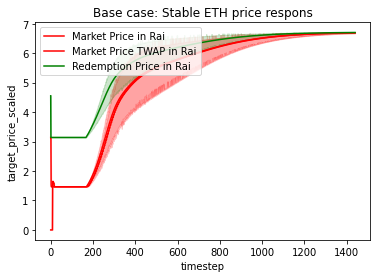

In [24]:
run = df_stable_price.query('run==1')
sns.lineplot(data=run,x="timestep", y="market_price",color='r',label='Market Price in Rai')
sns.lineplot(data=run,x="timestep", y="market_price_twap",color='r',label='Market Price TWAP in Rai')
sns.lineplot(data=run,x="timestep", y="target_price_scaled",color='g',label='Redemption Price in Rai')
plt.title('Base case: Stable ETH price respons')
plt.legend(loc="upper left")



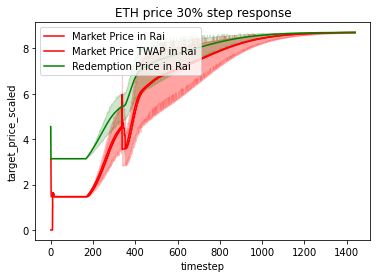

In [30]:
run = df_stable_price.query('run==2')
sns.lineplot(data=run,x="timestep", y="market_price",color='r',label='Market Price in Rai')
sns.lineplot(data=run,x="timestep", y="market_price_twap",color='r',label='Market Price TWAP in Rai')
sns.lineplot(data=run,x="timestep", y="target_price_scaled",color='g',label='Redemption Price in Rai')
plt.title('ETH price 30% step response')
plt.legend(loc="upper left")



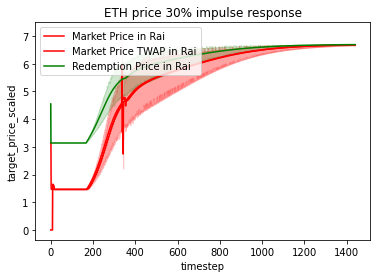

In [31]:
run = df_stable_price.query('run==3')
sns.lineplot(data=run,x="timestep", y="market_price",color='r',label='Market Price in Rai')
sns.lineplot(data=run,x="timestep", y="market_price_twap",color='r',label='Market Price TWAP in Rai')
sns.lineplot(data=run,x="timestep", y="target_price_scaled",color='g',label='Redemption Price in Rai')
plt.title('ETH price 30% impulse response')
plt.legend(loc="upper left")


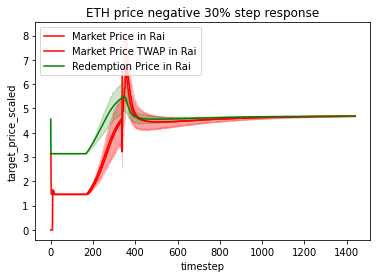

In [32]:
run = df_stable_price.query('run==4')
sns.lineplot(data=run,x="timestep", y="market_price",color='r',label='Market Price in Rai')
sns.lineplot(data=run,x="timestep", y="market_price_twap",color='r',label='Market Price TWAP in Rai')
sns.lineplot(data=run,x="timestep", y="target_price_scaled",color='g',label='Redemption Price in Rai')
plt.title('ETH price negative 30% step response')
plt.legend(loc="upper left")


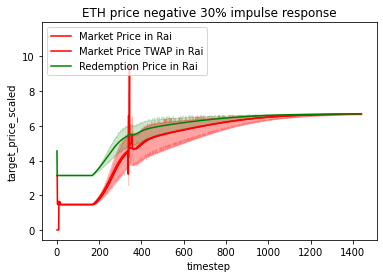

In [33]:
run = df_stable_price.query('run==5')
sns.lineplot(data=run,x="timestep", y="market_price",color='r',label='Market Price in Rai')
sns.lineplot(data=run,x="timestep", y="market_price_twap",color='r',label='Market Price TWAP in Rai')
sns.lineplot(data=run,x="timestep", y="target_price_scaled",color='g',label='Redemption Price in Rai')
plt.title('ETH price negative 30% impulse response')
plt.legend(loc="upper left")

Text(0.5, 1.0, 'Reflexer principal debt')

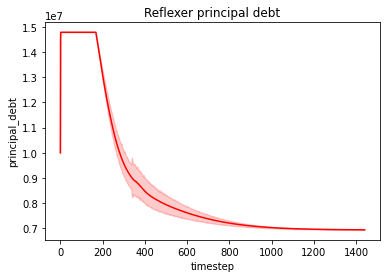

In [34]:
sns.lineplot(data=df_stable_price,x="timestep", y="principal_debt",color='r')
plt.title('Reflexer principal debt')


Text(0.5, 1.0, 'Secondary market RAI balance')

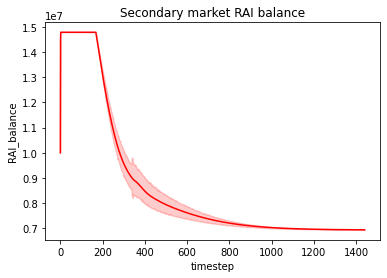

In [26]:
sns.lineplot(data=df_stable_price,x="timestep", y="RAI_balance",color='r')
plt.title('Secondary market RAI balance')


Text(0.5, 1.0, 'Reflexer ETH collateral')

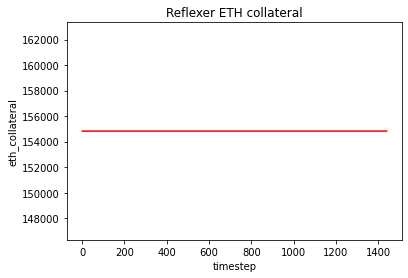

In [27]:
sns.lineplot(data=df_stable_price,x="timestep", y="eth_collateral",color='r')
plt.title('Reflexer ETH collateral')


Text(0.5, 1.0, 'Secondary market ETH balance')

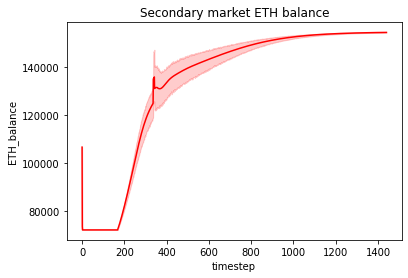

In [28]:
sns.lineplot(data=df_stable_price,x="timestep", y="ETH_balance",color='r')
plt.title('Secondary market ETH balance')


Text(0.5, 1.0, 'Collateralization ratio')

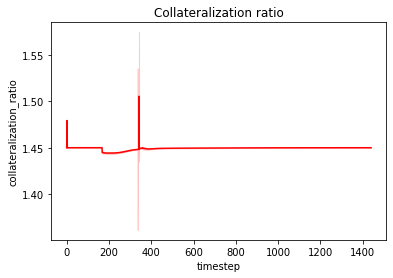

In [29]:
sns.lineplot(data=df_stable_price,x="timestep", y="collateralization_ratio",color='r')
plt.title('Collateralization ratio')


## Conclusion

In this notebook we provided an example of a shock test and the types of plots and analysis that can be performed off of it.